In [3]:
import unstructured_client
from unstructured_client.models import operations, shared

client = unstructured_client.UnstructuredClient(
    api_key_auth="SKlrgTLeGyfsBPydEmcfgaGmYdjEPS",
    # you may need to provide your unique API URL
    # server_url="YOUR_API_URL",
)

filename = "Analisis_razonados_2018_06.pdf"
file = open(filename, "rb")

res = client.general.partition(request=operations.PartitionRequest(
    partition_parameters=shared.PartitionParameters(
        # Note that this currently only supports a single file
        files=shared.Files(
            content=file.read(),
            file_name=filename,
        ),
        # Other parameters
        strategy=shared.Strategy.AUTO,
       # chunking_strategy=shared.ChunkingStrategy.BY_PAGE,
        languages=["spa"],
      #  pdf_infer_table_structure=True
    ),
))

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Concurrency level set to 5
INFO: Determined optimal split size of 6 pages.
INFO: Document split into 5, 6-paged sets.
INFO: Partitioning 5, 6-paged sets.
INFO: Partitioning set #1 (pages 1-7).
INFO: Partitioning set #2 (pages 7-13).
INFO: Partitioning set #3 (pages 13-19).
INFO: Partitioning set #4 (pages 19-25).
INFO: Partitioning set #5 (pages 25-29).
INFO: HTTP Request: POST https://api.unstructured.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructured.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructured.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructured.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final result.
INFO: Successfully partitioned set #3, elem

In [4]:
elements=res.elements

In [46]:
import fitz  # PyMuPDF
filename = "Analisis_razonados_2018_06.pdf"

def extract_text_by_page(pdf_path):
    # Open the provided PDF file
    pdf_document = fitz.open(pdf_path)
    dict={}
    # Iterate through each page in the document
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        
        # Extract text from the page
        text = page.get_text()

        dict[page_num]=text

    # Close the PDF document
    pdf_document.close()
    return(dict)

pages=extract_text_by_page(filename)

In [48]:
def chunk_pdf_page(pdf_path,page_num):  

    pdf_document = fitz.open(pdf_path)

    page = pdf_document.load_page(page_num)
    
    # Extract text from the page
    text = page.get_text()

    # Split text into lines
    lines = text.splitlines()

    return(lines)

In [28]:
def contains_number_using_isdigit(s):
    digits=0
    for char in s:
        digits+=char.isdigit()
    return(digits)

In [36]:
from pdfquery import PDFQuery

pdf = PDFQuery(filename)
pdf.load()

# Use CSS-like selectors to locate the elements
text_elements = pdf.pq('LTTextLineHorizontal')

# Extract the text from the elements
text = [t.text for t in text_elements]

print(text)

c:\Users\ataglem\AppData\Local\anaconda3\Lib\site-packages\pdfquery\pdfquery.py:589: RuntimeWarning: coroutine 'SplitPdfHook.before_request.<locals>.call_api_partial' was never awaited
  val = [self._filter_value(item) for item in val]


['', '', '', ' ', ' ', ' ', ' ', ' ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ' ', ' ', ' ', 'l presente análisis corresponde al período terminado el 30 de junio de 2018 y se ', 'compara con el mismo periodo del 2017. Ambos se presentan bajo las Normas ', 'Internacionales de Información Financiera (IFRS). ', '', 'l resultado al 30 de junio de 2018, alcanzó los M$2.568.428. Este resultado se ', 'encuentra dentro de las previsiones de la Compañía y si bien es un 42,9% inferior al del ', 'año pasado, no es extrapolable al segundo semestre de este año, ya que como se ha ', 'informado previamente, se espera un mejor desempeño durante lo que queda del año y ', 'especialmente durante el cuarto trimestre, lo anterior debido principalmente a que: ', '\uf0b7 El resultado del primer semestre del año anterior incorporaba, la utilidad ', 'proveniente de la venta de la línea transmisión de Los Hierros (M$1.665.602). ', '\uf0b7 La mayor 

In [35]:
from thefuzz import fuzz
import re
dict={}
concepts={"backlog":5,"construcción":2}
for i,el in enumerate(elements):
    text=el["text"]
    total_score=0
    for concept,weight in concepts.items():
        total_score+=weight*fuzz.partial_ratio(text, concept) # 80 treshold de lavenstein score  # ver bien que metrica usar 90 en wratio por ahi
        #total_score+=2*contains_number_using_isdigit(text)
    dict[i]=total_score

max_key = max(dict, key=dict.get)
elements[max_key]


{'type': 'NarrativeText',
 'element_id': '3d5b5fb2f04867381365c071d9065c91',
 'text': 'ii) En el Cuadro VI.7 se consignan los saldos por ejecutar (backlog) de obras o proyectos que se encuentran en construcción (obras ya iniciadas), tanto para proyectos propios como para aquellos desarrollados por sociedades o consorcios en los que BESALCO o sus filiales participan, sin considerar aquellos que son ejecutados por orden de un mandante:',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['spa'],
  'page_number': 18,
  'parent_id': 'f10bfeb091558155c1519e51a16d2198',
  'filename': 'Analisis_razonados_2018_06.pdf'}}

In [30]:
dict

{0: 0,
 1: 9,
 2: 10,
 3: 132,
 4: 46,
 5: 33,
 6: 33,
 7: 0,
 8: 236,
 9: 111,
 10: 0,
 11: 180,
 12: 0,
 13: 0,
 14: 33,
 15: 0,
 16: 33,
 17: 0,
 18: 33,
 19: 0,
 20: 33,
 21: 325,
 22: 302,
 23: 404,
 24: 404,
 25: 0,
 26: 50,
 27: 0,
 28: 49,
 29: 305,
 30: 330,
 31: 316,
 32: 373,
 33: 358,
 34: 51,
 35: 436,
 36: 409,
 37: 20,
 38: 12,
 39: 624,
 40: 701,
 41: 572,
 42: 712,
 43: 1143,
 44: 1024,
 45: 942,
 46: 20,
 47: 12,
 48: 569,
 49: 754,
 50: 577,
 51: 532,
 52: 563,
 53: 516,
 54: 20,
 55: 11,
 56: 504,
 57: 344,
 58: 7727,
 59: 423,
 60: 1267,
 61: 20,
 62: 901,
 63: 1069,
 64: 629,
 65: 536,
 66: 550,
 67: 20,
 68: 12,
 69: 615,
 70: 369,
 71: 5693,
 72: 313,
 73: 518,
 74: 516,
 75: 531,
 76: 690,
 77: 420,
 78: 676,
 79: 438,
 80: 1141,
 81: 20,
 82: 381,
 83: 492,
 84: 310,
 85: 446,
 86: 566,
 87: 140,
 88: 716,
 89: 498,
 90: 399,
 91: 408,
 92: 844,
 93: 20,
 94: 378,
 95: 764,
 96: 838,
 97: 875,
 98: 1062,
 99: 20,
 100: 394,
 101: 4687,
 102: 436,
 103: 1063,
 

In [ ]:
"""max_key
list=chunk_pdf_page(filename,max_key)
concepts={"construccion":2}
for page,text in enumerate(list):
    total_score=0
    for concept,weight in concepts.items():
        total_score+=weight*fuzz.WRatio(text, concept) # 80 treshold de lavenstein score  # ver bien que metrica usar 90 en wratio por ahi
        total_score+=3*contains_number_using_isdigit(text)
    dict[page]=total_score
max_key = max(dict, key=dict.get)

list[max_key]"""

In [55]:
from thefuzz import fuzz
import re
dict={}
concepts={"backlog":5,"obras civiles":1,"edificación":1,"construcción":2}
for page,text in pages.items():
    total_score=0
    for concept,weight in concepts.items():
        total_score+=weight*fuzz.partial_ratio(text, concept) # 80 treshold de lavenstein score  # ver bien que metrica usar 90 en wratio por ahi
    dict[page]=total_score

max_key = max(dict, key=dict.get)
print(max_key)
max_key
list=chunk_pdf_page(filename,max_key)
concepts={"construccion":2}
for page,text in enumerate(list):
    total_score=0
    for concept,weight in concepts.items():
        total_score+=weight*fuzz.WRatio(text, concept) # 80 treshold de lavenstein score  # ver bien que metrica usar 90 en wratio por ahi
        total_score+=3*contains_number_using_isdigit(text)
    dict[page]=total_score
max_key = max(dict, key=dict.get)

list[max_key]

14


'Construcción '

In [56]:
max_key

48

In [51]:
dict

{0: 0,
 1: 6,
 2: 82,
 3: 112,
 4: 78,
 5: 0,
 6: 94,
 7: 106,
 8: 86,
 9: 0,
 10: 69,
 11: 0,
 12: 68,
 13: 82,
 14: 82,
 15: 96,
 16: 0,
 17: 94,
 18: 121,
 19: 95,
 20: 0,
 21: 107,
 22: 91,
 23: 91,
 24: 96,
 25: 0,
 26: 82,
 27: 95,
 28: 118,
 29: 94,
 30: 0,
 31: 78,
 32: 114,
 33: 112,
 34: 93,
 35: 0,
 36: 0,
 37: 24,
 38: 24,
 39: 58,
 40: 66,
 41: 66,
 42: 72,
 43: 72,
 44: 24,
 45: 24,
 46: 0,
 47: 0,
 48: 200,
 49: 24,
 50: 27,
 51: 27,
 52: 27,
 53: 64,
 54: 21,
 55: 21,
 56: 21,
 57: 24,
 58: 78,
 59: 24,
 60: 21,
 61: 24,
 62: 24,
 63: 72,
 64: 24,
 65: 27,
 66: 27,
 67: 27,
 68: 0,
 69: 0,
 70: 0}

In [12]:
#from tabula import read_pdf
from camelot import read_pdf
import pandas as pd
import os

class BasePDFclass:
    def __init__(self,pdf_path):
        self.pdf_path = pdf_path
    
    def extract_tables(self):
        """ Método a implementar que entregue todas las tablas en formato de una ista de dataframes
        """
        raise NotImplementedError

class Image_PDF_extractor():
    def __init__(self):
        pass

    def exctract_tables(self):
        pass



class Text_PDF_extractor():
    def __init__(self):
        pass
    def extract_tables(self,pdf_path,pages="all"):
        df = read_pdf(pdf_path,pages=pages)
        return(df)


class PDF_tables(BasePDFclass):
    """Class that exctract all the tables of the pdf"""
    
    def __init__(self, pdf_path):
        super().__init__(pdf_path)
        self.text_extractor=Text_PDF_extractor()
        self.image_exctractor=Image_PDF_extractor()

        current_dir = os.getcwd()
        self.csv_path=os.path.join(current_dir, "data","industrydata","pdf","csv")
        self.excel_path=os.path.join(current_dir, "data", "industrydata", "pdf", "excel")

        os.makedirs(self.excel_path, exist_ok=True)
        os.makedirs(self.csv_path, exist_ok=True)



    def extract_tables(self,pages="all"):
        #df_images=self.image_exctractor.extract_tables(pages=pages)
        df_text=self.text_extractor.extract_tables(self.pdf_path,pages=pages)
        #hacer un merge de las dos listas...
        # ojo que en el merge es probable que se repitan las dos tablas
        self.df_list=df_text
        print(f"Extracted {len(self.df_list)} tables")

    def search_concept(self,concept=None): # quizas hacer uno de si es el titulo o no...
        """ Search for a concept in the dataframes, if given, returns a list of dataframes with the given concept
            quizas pasar todo a minuscula...  o a regex
        """ 
        if concept==None:
            return(self.df_list)
        
        match_list=[]
        for df in self.df_list:

            df_lower = df.map(lambda x: x.lower() if isinstance(x, str) else x) # uses lower case to match

            is_string_present = df_lower.isin([concept]).any().any()
            if is_string_present:
                match_list.append(df)
        return(match_list)
    
    def preprocess_data(self,df_list,function=None):
        "quizas implementar funciones propias por empresa..."

        for i,df in enumerate(df_list):

            df = df.apply(lambda x: x.astype(str).str.replace('.', ''))
            df = df.apply(lambda x: x.astype(str).str.replace('(', ''))
            df = df.apply(lambda x: x.astype(str).str.replace(')', ''))
            df.dropna(how="all",inplace=True)
            df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
            df_list[i]=df

        return(df_list)
    
    def tables_to_excel(self,filename,concept=None):
        
        match_list=self.search_concept(concept)
        df_preprocess_list=self.preprocess_data(match_list)
        print(len(df_preprocess_list))
        filepath=os.path.join(self.excel_path, f"{filename}.xlsx")

        with pd.ExcelWriter(filepath) as writer:
            for  i,df in enumerate(df_preprocess_list):
                df.to_excel(writer,sheet_name=f"sheetname_{i}")
        pass
    
    def download_table(self,path,table_name): # ver como seleccionar una tabla para descargar... 
        raise NotImplementedError


In [124]:
import fitz  # PyMuPDF
filename="Estados_financieros_2010_03-páginas.pdf"
def extract_text_chunks(filename):
    doc = fitz.open(filename)
    chunks = []
    
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        blocks = page.get_text("dict")["blocks"]
        
        for block in blocks:
            if block["type"] == 0:  # Text block
                chunks.append(block["lines"][0]["spans"][0]["text"])
    
    return chunks

a=extract_text_chunks(filename)

In [113]:
import camelot
import fitz  # PyMuPDF
from thefuzz import fuzz
import datetime
import re
from pdfquery import PDFQuery


def extract_titles_and_tables(pdf_file):
    tables_with_titles = []

    # Extract tables from each page using Camelot
    tables = camelot.read_pdf(pdf_file,flavor='stream',pages="all",row_tol=10, strip_text='\n',edge_tol=500,column_tol=5)

    # Open the PDF document with PyMuPDF
    doc = fitz.open(pdf_file)
    date_patterns = [
        r'\d{1,2}/\d{1,2}/\d{4}',                    # 01/31/2023
        r'\d{1,2}-\d{1,2}-\d{4}',                    # 01-31-2023
        r'\d{4}-\d{2}-\d{2}',                        # 2023-01-31
        r'\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{4}',  # 31 Jan 2023
        r'(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2},\s+\d{4}',  # Jan 31, 2023
    ]

    # Compile regex patterns
    regex = re.compile('|'.join(date_patterns))

    for table in tables:
        # Extract text from the page for title extraction
        page_num = table.page - 1  # Page numbers in Camelot are 1-based

        """  # Load the page using PyMuPDF
        page = doc.load_page(page_num)

        # Extracting text from the current page
        text = page.get_text(sort=True,flags=2) #option="blocks"(option="blocks",flags=2)
    
        # Close the document
        matches = regex.findall(text)
        date_results = []

        for match in matches:
            try:
                # Validate the matched date using datetime.strptime
               # date_obj = datetime.strptime(match, '%m/%d/%Y')  # Adjust format string as needed
                date_results.append((page_num + 1, match))  # Store page number and date string
            except ValueError:
                continue  # Skip if date format does not match"""
    

        # Extract title for the current table
        title = extract_title_above_table(page_num, table)
        tables_with_titles.append((title, table.df))
    doc.close()
    return tables_with_titles


def extract_title_above_table(page_num, table):
    top_ypos_table=table.rows[0][0]
    x_pos_table_min=table.cols[0][0]
    x_pos_table_max=table.cols[-1][-1]

    pdf = PDFQuery(pdf_file)
    pdf.load(page_num)


    # Use CSS-like selectors to locate the elements
    for i in range(100):
        text_elements = pdf.pq('LTTextLineHorizontal:overlaps_bbox("%s, %s, %s, %s")' % (x_pos_table_min, top_ypos_table, x_pos_table_max, top_ypos_table+i)).text()
        if len(text_elements)!=0 :
            break
    
    date_patterns = [
        r'\d{1,2}/\d{1,2}/\d{4}',                    # 01/31/2023
        r'\d{1,2}-\d{1,2}-\d{4}',                    # 01-31-2023
        r'\d{4}-\d{2}-\d{2}',                        # 2023-01-31
        r'\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{4}',  # 31 Jan 2023
        r'(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2},\s+\d{4}',  # Jan 31, 2023
    ]

    # Compile regex patterns
    regex = re.compile('|'.join(date_patterns))
    matches = regex.findall(text_elements)
    date_results = []
    print(matches)
    for match in matches:
        try:
            # Validate the matched date using datetime.strptime
            # date_obj = datetime.strptime(match, '%m/%d/%Y')  # Adjust format string as needed
            date_results.append((page_num + 1, match))  # Store page number and date string
        except ValueError:
            continue  # Skip if date format does not match"""


    return(text_elements)

# Example usage:
pdf_file = "Estados_financieros_2010_03-páginas.pdf"
list=tables_with_titles = extract_titles_and_tables(pdf_file)



['31/03/2010', '31/12/2009', '01/01/2009']
[]
['31/03/2010', '31/03/2009']
[]


In [110]:
from camelot import read_pdf

pdf_path = "Estados_financieros_2010_03-páginas.pdf"
#df = read_pdf(pdf_path,pages="all",stream=True)
df = read_pdf(pdf_path,flavor='stream',pages="all",row_tol=5, strip_text='\n',edge_tol=10000,column_tol=0)#,layout_kwargs={"boxes_flow":1})

In [1]:
df[2].df

NameError: name 'df' is not defined

C:\Users\ataglem\AppData\Local\Temp\ipykernel_13640\2370395407.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(df[2], kind='contour').show()


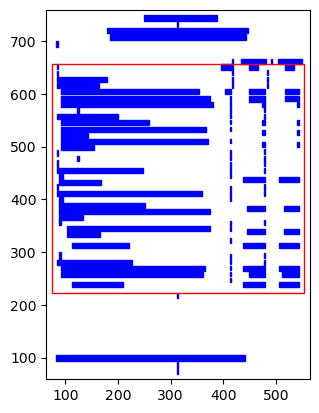

In [43]:
import camelot
camelot.plot(df[2], kind='contour').show()


In [119]:
pdf_path='data/industrydata/besalco/raw/pdf_financials/Estados_financieros_2010_03.pdf'
pdf_tables_instance=PDF_tables(pdf_path)
pdf_tables_instance.extract_tables()
#df_list=pdf_tables_instance.search_concept()
pdf_tables_instance.tables_to_excel(filename="razonados_besalco")

KeyboardInterrupt: 

In [82]:
len(df_list)

101

In [74]:
df=df[0]

In [85]:
for i,df in enumerate(df_list):
    print(i)
    df = df.apply(lambda x: x.astype(str).str.replace('.', ''))
    df = df.apply(lambda x: x.astype(str).str.replace('(', ''))
    df = df.apply(lambda x: x.astype(str).str.replace(')', ''))
    df.dropna(how="all",inplace=True)
    df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [87]:
df_list[21]

,Total Escriturado,Unnamed: 0,Unnamed: 1,31-12-2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,31-12-2021,Unnamed: 5
0,NaN,Rango UF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Proyectos Propios),NaN,M$,NaN,Unidades,NaN,M$,NaN,Unidades
2,Nacional:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0 - 1.000,NaN,-,-,NaN,NaN,-,-
4,NaN,1.001 - 2.000,NaN,-,-,NaN,NaN,-,-
5,NaN,2.001 - 4.000,4.376.357,NaN,48,NaN,7.410.439,NaN,93
6,Casas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,4.001 - 6.000,NaN,-,-,NaN,NaN,-,-
8,NaN,6.001 - 9.000,NaN,-,-,NaN,NaN,-,-
9,NaN,sobre 9.000,9.980.782,NaN,24,NaN,13.197.703,NaN,36
